<a href="https://colab.research.google.com/github/daakanksha/Major-project-on-owid-covid/blob/main/COVID_19_PANDEMIC_major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Major project on owid covid dataset provided
By Aakanksha D

In [ ]:
#Importing libraries 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import datetime as dt
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Loading dataset
url = '/content/owid-covid-data.csv'
data = pd.read_csv(url)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80322 entries, 0 to 80321
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               80322 non-null  object 
 1   continent                              76409 non-null  object 
 2   location                               80322 non-null  object 
 3   date                                   80322 non-null  object 
 4   total_cases                            78694 non-null  float64
 5   new_cases                              78692 non-null  float64
 6   new_cases_smoothed                     77691 non-null  float64
 7   total_deaths                           69218 non-null  float64
 8   new_deaths                             69376 non-null  float64
 9   new_deaths_smoothed                    77691 non-null  float64
 10  total_cases_per_million                78267 non-null  float64
 11  ne

In [ ]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,7.869400e+04,78692.000000,77691.000000,6.921800e+04,69376.000000,77691.000000,78267.000000,78265.000000,77269.000000,68804.000000,68962.000000,77269.000000,64756.000000,8456.000000,8456.000000,10127.000000,10127.000000,743.000000,743.000000,1240.000000,1240.000000,3.693100e+04,3.666100e+04,36661.000000,36931.000000,4.224600e+04,42246.000000,40925.000000,40309.000000,6.820000e+03,6.192000e+03,4.391000e+03,5.777000e+03,1.080200e+04,6820.000000,6192.000000,4391.000000,10802.000000,68455.000000,7.982400e+04,74865.000000,72607.000000,71775.000000,72199.000000,72906.000000,49715.000000,73497.000000,74480.000000,57688.000000,56836.000000,36917.000000,67179.000000,76245.000000,73439.000000
mean,7.429238e+05,5430.286471,5417.396717,2.128240e+04,134.662001,118.743826,8965.988111,71.393497,71.212973,204.718066,1.456059,1.280681,1.021877,1032.227412,24.683618,4765.028241,165.613372,271.228685,20.480506,3935.503165,113.637663,4.090608e+04,5.396336e+06,200.991567,1.701402,3.924693e+04,1.615332,0.088060,161.882140,1.065782e+07,7.042459e+06,3.486818e+06,3.696729e+05,1.975201e+05,10.275947,7.373792,3.980631,2579.171172,58.724224,1.295847e+08,342.863126,30.533267,8.781414,5.563671,19138.207162,13.312278,257.521929,7.809495,10.528849,32.655004,50.952758,3.031607,73.156758,0.727453
std,5.169702e+06,33480.103666,32963.628052,1.253299e+05,734.731397,670.245949,17412.235307,173.981249,147.043462,361.088519,3.938565,2.861836,0.360881,3024.061648,27.082366,12539.248661,206.906237,570.645988,36.851142,11724.177615,232.836546,1.541591e+05,2.470197e+07,419.147547,4.636338,1.415873e+05,3.764540,0.097634,880.488825,4.501895e+07,2.707271e+07,1.243248e+07,1.431444e+06,9.431978e+05,18.801925,12.099113,8.478574,4758.388183,21.832720,6.937368e+08,1672.598865,9.113487,6.229958,4.254000,19785.659424,19.929106,118.677828,3.957991,10.402590,13.474173,31.765209,2.464940,7.551948,0.150071
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,0.000000e+00,0.000000,-23.010000,0.000000e+00,0.000000,0.000000,1.300000,0.000000e+00,0.000000e+00,1.000000e+00,-2.928600e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,8.430000e+02,2.000000,6.429000,4.200000e+01,0.000000,0.000000,178.762500,0.168000,1.086000,6.238000,0.000000,0.000000,0.860000,24.000000,3.675000,99.000000,20.794000,7.896500,1.678000,53.242250,9.064750,1.379500e+03,1.134750e+05,10.283000,0.119000,1.408000e+03,0.117000,0.016000,7.800000,5.347925e+04,4.971825e+04,2.500400e+04,3.388000e+03,1.037000e+03,0.730000,0.630000,0.330000,300.250000,44.440000,2.540916e+06,36.25

In [ ]:
data.shape

(80322, 59)

In [ ]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [ ]:
data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,0.026,0.000,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,0.051,0.026,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,0.103,0.051,0.011,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
data.tail(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
80312,ZWE,Africa,Zimbabwe,2021-03-30,36839.0,0.0,17.429,1520.0,0.0,0.571,2478.583,0.000,1.173,102.268,0.000,0.038,0.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2675.0,435853.0,29.325,0.180,2248.0,0.151,0.008,129.0,tests performed,85866.0,72944.0,12922.0,4256.0,5810.0,0.58,0.49,0.09,391.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
80313,ZWE,Africa,Zimbabwe,2021-03-31,36882.0,43.0,19.000,1523.0,3.0,1.000,2481.476,2.893,1.278,102.470,0.202,0.067,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1440.0,437293.0,29.422,0.097,1951.0,0.131,0.010,102.7,tests performed,91880.0,76995.0,14885.0,6014.0,5712.0,0.62,0.52,0.10,384.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
80314,ZWE,Africa,Zimbabwe,2021-04-01,36896.0,14.0,16.857,1523.0,0.0,0.714,2482.418,0.942,1.134,102.470,0.000,0.048,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2337.0,439630.0,29.579,0.157,2012.0,0.135,0.008,119.4,tests performed,105307.0,87791.0,17516.0,13427.0,6617.0,0.71,0.59,0.12,445.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
80315,ZWE,Africa,Zimbabwe,2021-04-02,36903.0,7.0,14.000,1524.0,1.0,0.857,2482.889,0.471,0.942,102.537,0.067,0.058,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1362.0,440992.0,29.671,0.092,1767.0,0.119,0.008,126.2,tests performed,124753.0,103815.0,20938.0,19446.0,8156.0,0.84,0.70,0.14,549.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
80316,ZWE,Africa,Zimbabwe,2021-04-03,36911.0,8.0,13.286,1524.0,0.0,0.714,2483.427,0.538,0.894,102.537,0.000,0.048,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1081.0,442073.0,29.743,0.073,1637.0,0.110,0.008,123.2,tests performed,132915.0,111588.0,21327.0,8162.0,8498.0,0.89,0.75,0.14,572.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
80317,ZWE,Africa,Zimbabwe,2021-04-04,36923.0,12.0,14.429,1525.0,1.0,0.714,2484.235,0.807,0.971,102.604,0.067,0.048,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1115.0,443188.0,29.818,0.075,1640.0,0.110,0.009,113.7,tests performed,138900.0,117297.0,21603.0,5985.0,8537.0,0.93,0.79,0.15,574.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
80318,ZWE,Africa,Zimbabwe,2021-04-05,36934.0,11.0,13.571,1525.0,0.0,0.714,2484.975,0.740,0.913,102.604,0.000,0.048,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1171.0,444359.0,29.897,0.079,1597.0,0.107,0.008,117.7,tests performed,145510.0,123454.0,22056.0,6610.0,9129.0,0.98,0.83,0.15,614.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
80319,ZWE,Africa,Zimbabwe,2021-04-06,36966.0,32.0,18.143,1531.0,6.0,1.571,2487.128,2.153,1.221,103.008,0.404,0.106,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1604.0,4459

In [ ]:
#looking at different locations
data["location"].value_counts()

Argentina           464
Mexico              464
Thailand            461
Peru                458
Taiwan              449
                   ... 
Falkland Islands     48
Anguilla             44
Saint Helena         41
Montserrat           38
Greenland            34
Name: location, Length: 215, dtype: int64

In [ ]:
#checking if columns have null values
data.isna().any()

iso_code                                 False
continent                                 True
location                                 False
date                                     False
total_cases                               True
new_cases                                 True
new_cases_smoothed                        True
total_deaths                              True
new_deaths                                True
new_deaths_smoothed                       True
total_cases_per_million                   True
new_cases_per_million                     True
new_cases_smoothed_per_million            True
total_deaths_per_million                  True
new_deaths_per_million                    True
new_deaths_smoothed_per_million           True
reproduction_rate                         True
icu_patients                              True
icu_patients_per_million                  True
hosp_patients                             True
hosp_patients_per_million                 True
weekly_icu_ad

In [ ]:
#Getting the sum of null values across each column
data.isnull().sum()

iso_code                                     0
continent                                 3913
location                                     0
date                                         0
total_cases                               1628
new_cases                                 1630
new_cases_smoothed                        2631
total_deaths                             11104
new_deaths                               10946
new_deaths_smoothed                       2631
total_cases_per_million                   2055
new_cases_per_million                     2057
new_cases_smoothed_per_million            3053
total_deaths_per_million                 11518
new_deaths_per_million                   11360
new_deaths_smoothed_per_million           3053
reproduction_rate                        15566
icu_patients                             71866
icu_patients_per_million                 71866
hosp_patients                            70195
hosp_patients_per_million                70195
weekly_icu_ad

In [ ]:
#Convert 3 character ISO country codes to two character ones
data["iso_code"].unique()

array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'OWID_ASI', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA',
       'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV',
       'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'CRI',
       'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'COD', 'DNK', 'DJI', 'DMA',
       'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH',
       'OWID_EUR', 'OWID_EUN', 'FRO', 'FLK', 'FJI', 'FIN', 'FRA', 'GAB',
       'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GTM',
       'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL',
       'IND', 'IDN', 'OWID_INT', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA',
       'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'OWID_KOS', 'KWT', 'KGZ',
       'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX',
       'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MRT

In [ ]:
df=data.dropna()
df.shape

(0, 59)

Text(0.5, 1.0, 'Population in certain location based on available data')

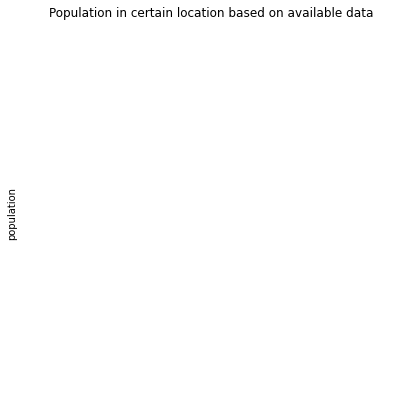

In [ ]:
df['continent'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%',figsize=(10,7), shadow=True, startangle=135, legend=True, cmap='Pastel1')
plt.ylabel('population')
plt.title('Population in certain location based on available data')

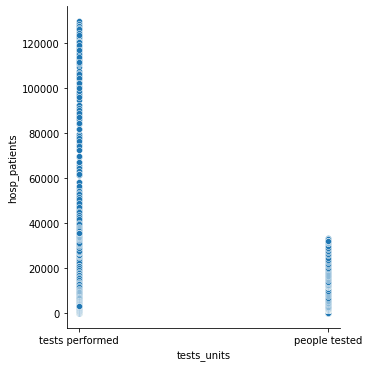

In [ ]:
sns.relplot(x="tests_units",y="hosp_patients",data=data)

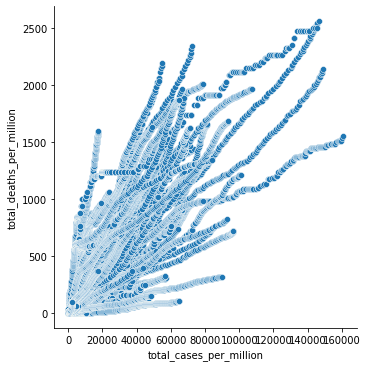

In [ ]:
sns.relplot(x="total_cases_per_million",y="total_deaths_per_million",data=data)

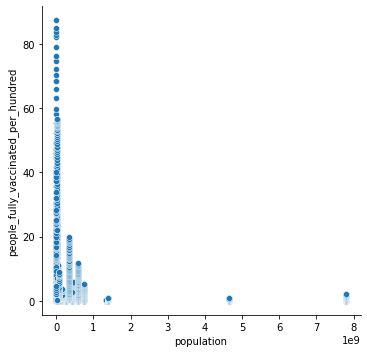

In [ ]:
sns.relplot(x="population",y="people_fully_vaccinated_per_hundred",data=data)

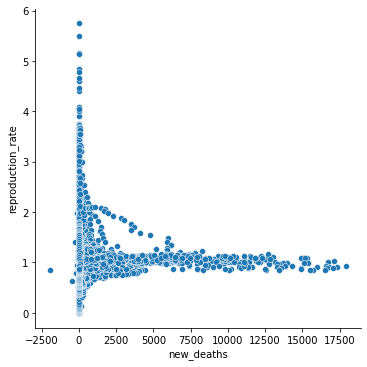

In [ ]:
sns.relplot(x="new_deaths",y="reproduction_rate",data=data)

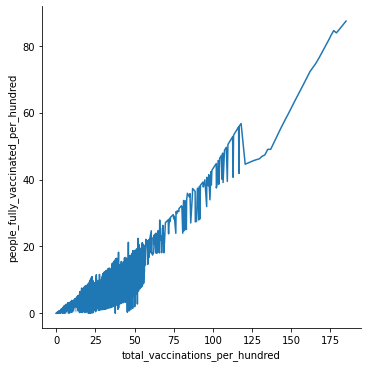

In [ ]:
sns.relplot(x="total_vaccinations_per_hundred",y="people_fully_vaccinated_per_hundred",kind='line',data=data)

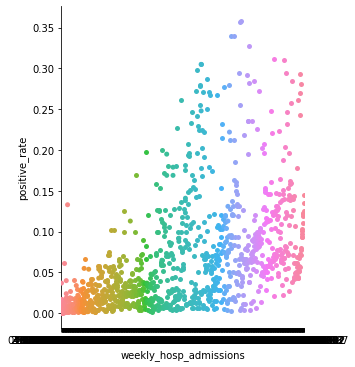

In [ ]:
sns.catplot(x="weekly_hosp_admissions",y="positive_rate",data=data)

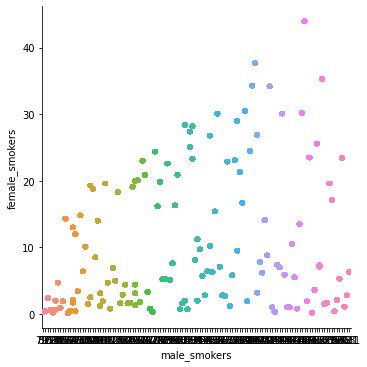

In [ ]:
sns.catplot(x="male_smokers",y="female_smokers",data=data)

In [ ]:
#Getting cases across india
india_case=data[data["location"]=="India"]
india_case

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
32969,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32970,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32971,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32972,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32973,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33399,IND,Asia,India,2021-04-04,12589067.0,103558.0,78489.000,165101.0,478.0,465.429,9122.483,75.042,56.876,119.638,0.346,0.337,1.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1166716.0,248125908.0,179.801,0.845,1025009.0,0.743,0.077,13.1,samples tested,79105163.0,68678838.0,10426325.0,3125512.0,2653533.0,5.73,4.98,0.76,1923.0,74.54,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
33400,IND,Asia,India,2021-04-05,12686049.0,96982.0,84313.429,165547.0,446.0,490.429,9192.760,70.277,61.096,119.961,0.323,0.355,1.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,893749.0,249019657.0,180.448,0.648,1022214.0,0.741,0.082,12.1,samples tested,83110926.0,72277309.0,10833617.0,4005763.0,3142510.0,6.02,5.24,0.79,2277.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
33401,IND,Asia,India,2021-04-06,12801785.0,115736.0,93207.143,166177.0,630.0,529.857,9276.626,83.866,67.541,120.418,0.457,0.384,1.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1211612.0,250231269.0,181.326,0.878,1083035.0,0.785,0.086,11.6,samples tested,87077474.0,75937015.0,11140459.0,3966548

In [ ]:
# FB prophet
fb_data = india_case.rename(columns = {'date':'ds','total_cases':'y'})
fb_data['ds'] = pd.to_datetime(fb_data['ds'])
#fb_data['y']=fb_data['y'].astype(int)
m=Prophet(changepoint_prior_scale=1)
m.fit(fb_data)
forecast=m.make_future_dataframe(periods=30,freq='D')
forecast=m.predict(forecast)
forecast

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-5.244811e+02,-1.378643e+05,1.395803e+05,-5.244811e+02,-5.244811e+02,6950.808737,6950.808737,6950.808737,6950.808737,6950.808737,6950.808737,0.0,0.0,0.0,6.426328e+03
1,2020-01-31,-5.117357e+02,-1.449242e+05,1.290066e+05,-5.117357e+02,-5.117357e+02,-4898.815566,-4898.815566,-4898.815566,-4898.815566,-4898.815566,-4898.815566,0.0,0.0,0.0,-5.410551e+03
2,2020-02-01,-4.989903e+02,-1.366666e+05,1.352770e+05,-4.989903e+02,-4.989903e+02,-1791.552109,-1791.552109,-1791.552109,-1791.552109,-1791.552109,-1791.552109,0.0,0.0,0.0,-2.290542e+03
3,2020-02-02,-4.862448e+02,-1.465674e+05,1.372780e+05,-4.862448e+02,-4.862448e+02,-299.320920,-299.320920,-299.320920,-299.320920,-299.320920,-299.320920,0.0,0.0,0.0,-7.855657e+02
4,2020-02-03,-4.734994e+02,-1.447402e+05,1.373320e+05,-4.734994e+02,-4.734994e+02,-2549.991516,-2549.991516,-2549.991516,-2549.991516,-2549.991516,-2549.991516,0.0,0.0,0.0,-3.023491e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,2021-05-04,1.275265e+07,1.249900e+07,1.298295e+07,1.253499e+07,1.295524e+07,-972.356871,-972.356871,-972.356871,-972.356871,-972.356871,-972.356871,0.0,0.0,0.0,1.275167e+07
461,2021-05-05,1.277449e+07,1.250667e+07,1.303154e+07,1.254623e+07,1.299008e+07,3561.228245,3561.228245,3561.228245,3561.228245,3561.228245,3561.228245,0.0,0.0,0.0,1.277805e+07
462,2021-05-06,1.279634e+07,1.250622e+07,1.307968e+07,1.255535e+07,1.302254e+07,6950.808737,6950.808737,6950.808737,6950.808737,6950.808737,6950.808737,0.0,0.0,0.0,1.280329e+07
463,2021-05-07,1.281819e+07,1.251869e+07,1.309843e+07,1.255827e+07,1.305704e+07,-4898.815566,-4898.815566,-4898.815566,-4898.815566,-4898.815566,-4898.815566,0.0,0.0,0.0,1.281329e+07


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

In [ ]:
plt.figure(figsize=(20,5))
plt.scatter(fb_data['ds'],fb_data['y'])
plt.plot(forecast['ds'],forecast['yhat'],c='red')
plt.plot(forecast['ds'],forecast['yhat_lower'],c='yellow')
plt.plot(forecast['ds'],forecast['yhat_upper'],c='k')
plt.show()

In [ ]:
fig = plot_plotly(m, forecast, changepoints=False,xlabel="Date", ylabel="total_cases",uncertainty=True,plot_cap=True)
fig.update_layout(showlegend=True)

In [ ]:
# Total cases per day
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_case)
plt.show()

In [ ]:
# Making a dataframe for last 5 days {India}
india_last_5days=india_case.tail()

In [ ]:
#total cases in last five days
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_last_5days)
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


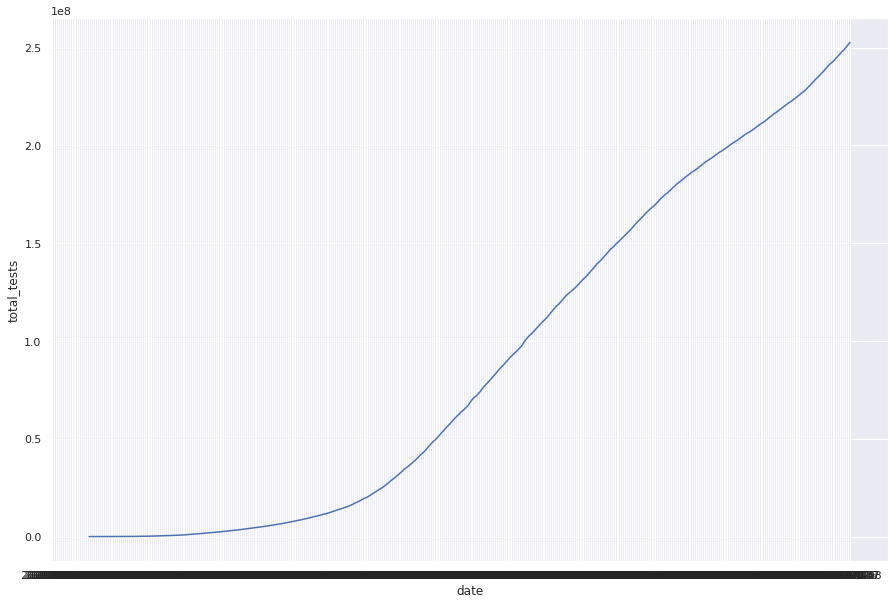

In [ ]:
# Total cases per day
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_tests",data=india_case)
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


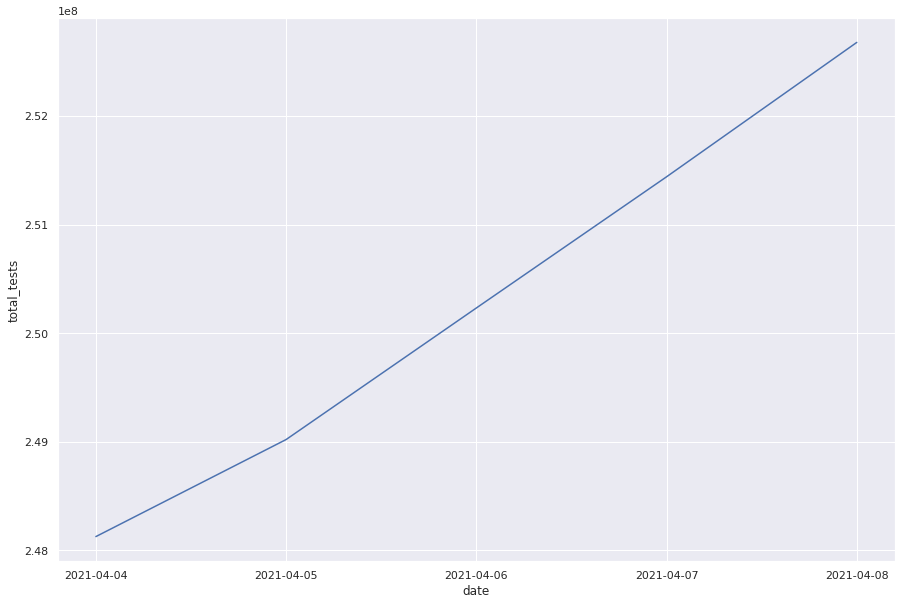

In [ ]:
#total cases in last five days
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_tests",data=india_last_5days)
plt.show()

In [ ]:
#Getting cases across Greenland
greenland_case=data[data["location"]=="Greenland"]
greenland_case

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
29190,GRL,North America,Greenland,2021-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2584.0,2584.0,NaN,NaN,NaN,4.55,4.55,NaN,NaN,37.04,56772.0,0.137,NaN,NaN,NaN,NaN,NaN,199.941,2.16,NaN,NaN,NaN,NaN,71.7,NaN
29191,GRL,North America,Greenland,2021-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,1356.0,37.04,56772.0,0.137,NaN,NaN,NaN,NaN,NaN,199.941,2.16,NaN,NaN,NaN,NaN,71.7,NaN
29192,GRL,North America,Greenland,2021-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,1356.0,37.04,56772.0,0.137,NaN,NaN,NaN,NaN,NaN,199.941,2.16,NaN,NaN,NaN,NaN,71.7,NaN
29193,GRL,North America,Greenland,2021-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,1356.0,37.04,56772.0,0.137,NaN,NaN,NaN,NaN,NaN,199.941,2.16,NaN,NaN,NaN,NaN,71.7,NaN
29194,GRL,North America,Greenland,2021-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,1356.0,37.04,56772.0,0.137,NaN,NaN,NaN,NaN,NaN,199.941,2.16,NaN,NaN,NaN,NaN,71.7,NaN
29195,GRL,North America,Greenland,2021-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,1356.0,37.04,56772.0,0.137,NaN,NaN,NaN,NaN,NaN,199.941,2.16,NaN,NaN,NaN,NaN,71.7,NaN
29196,GRL,North America,Greenland,2021-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,1356.0,37.04,56772.0,0.137,NaN,NaN,NaN,NaN,NaN,199.941,2.16,NaN,NaN,NaN,NaN,71.7,NaN
29197,GRL,North America,Greenland,2021-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,1356.0,37.04,56772.0,0.137,NaN,NaN,NaN,NaN,NaN,199.941,2.16,NaN,NaN,NaN,NaN,71.7,NaN
29198,GRL,North America,Greenland,2021-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,1356.0,37.04,56772.0,0.137,NaN,NaN,NaN,NaN,NaN,199.941,2.16,NaN,NaN,NaN,NaN,71.7,NaN
29199,GRL,North America,Greenland,2021-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,1356.0,37.04,56772.0,0.137,NaN,NaN,NaN,NaN,NaN,199.941,2.16,NaN,NaN,NaN,NaN,71.7,NaN


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


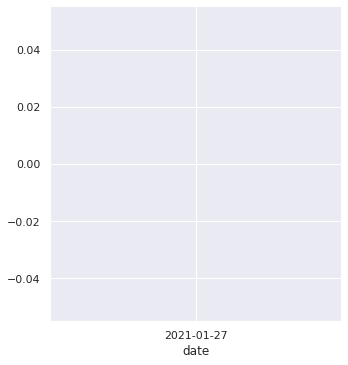

In [ ]:
# Total cases per day
sns.set(rc={'figure.figsize':(10,5)})
sns.relplot(x="date",y="total_cases",data=greenland_case)
plt.show()

In [ ]:
# Understanding cases bewteen three different locations
three_countries=data[(data["location"]=="India")|(data["location"]=="China")|(data["location"]=="South Korea")]
three_countries

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
15207,CHN,Asia,China,2020-01-22,548.0,NaN,NaN,17.0,NaN,NaN,0.381,NaN,NaN,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.39,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761
15208,CHN,Asia,China,2020-01-23,643.0,95.0,NaN,18.0,1.0,NaN,0.447,0.066,NaN,0.013,0.001,NaN,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761
15209,CHN,Asia,China,2020-01-24,920.0,277.0,NaN,26.0,8.0,NaN,0.639,0.192,NaN,0.018,0.006,NaN,3.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761
15210,CHN,Asia,China,2020-01-25,1406.0,486.0,NaN,42.0,16.0,NaN,0.977,0.338,NaN,0.029,0.011,NaN,3.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.69,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761
15211,CHN,Asia,China,2020-01-26,2075.0,669.0,NaN,56.0,14.0,NaN,1.442,0.465,NaN,0.039,0.010,NaN,3.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67542,KOR,Asia,South Korea,2021-04-04,105752.0,473.0,515.857,1748.0,4.0,3.143,2062.682,9.226,10.062,34.095,0.078,0.061,1.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15364.0,7769677.0,151.547,0.300,36098.0,0.704,0.014,70.0,people tested,990094.0,962730.0,27364.0,713.0,27271.0,1.93,1.88,0.05,532.0,58.33,5.126918e+07,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.80,6.2,40.9,NaN,12.27,83.03,0.916
67543,KOR,Asia,South Korea,2021-04-05,106230.0,478.0,521.143,1752.0,4.0,3.286,2072.005,9.323,10.165,34.173,0.078,0.064,1.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18646.0,7788323.0,151.910,0.364,35847.0,0.699,0.015,68.8,people tested,1027561.0,999870.0,27691.0,37467.0,28423.0,2.00,1.95,0.05,554.0,NaN,5.126918e+07,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.80,6.2,40.9,NaN,12.27,83.03,0.916
67544,KOR,Asia,South Korea,2021-04-06,106898.0,668.0,544.286,1756.0,4.0,3.571,2085.034,13.029,10.616,34.251,0.078,0.070,1.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53812.0,7842135.0,152.960,1.050,36651.0,0.715,0.015,67.3,people tested,1072480.0,1039066.0,33414.0,44919.0,30299.0,2.09,2.03,0.07,591.0,NaN,5.

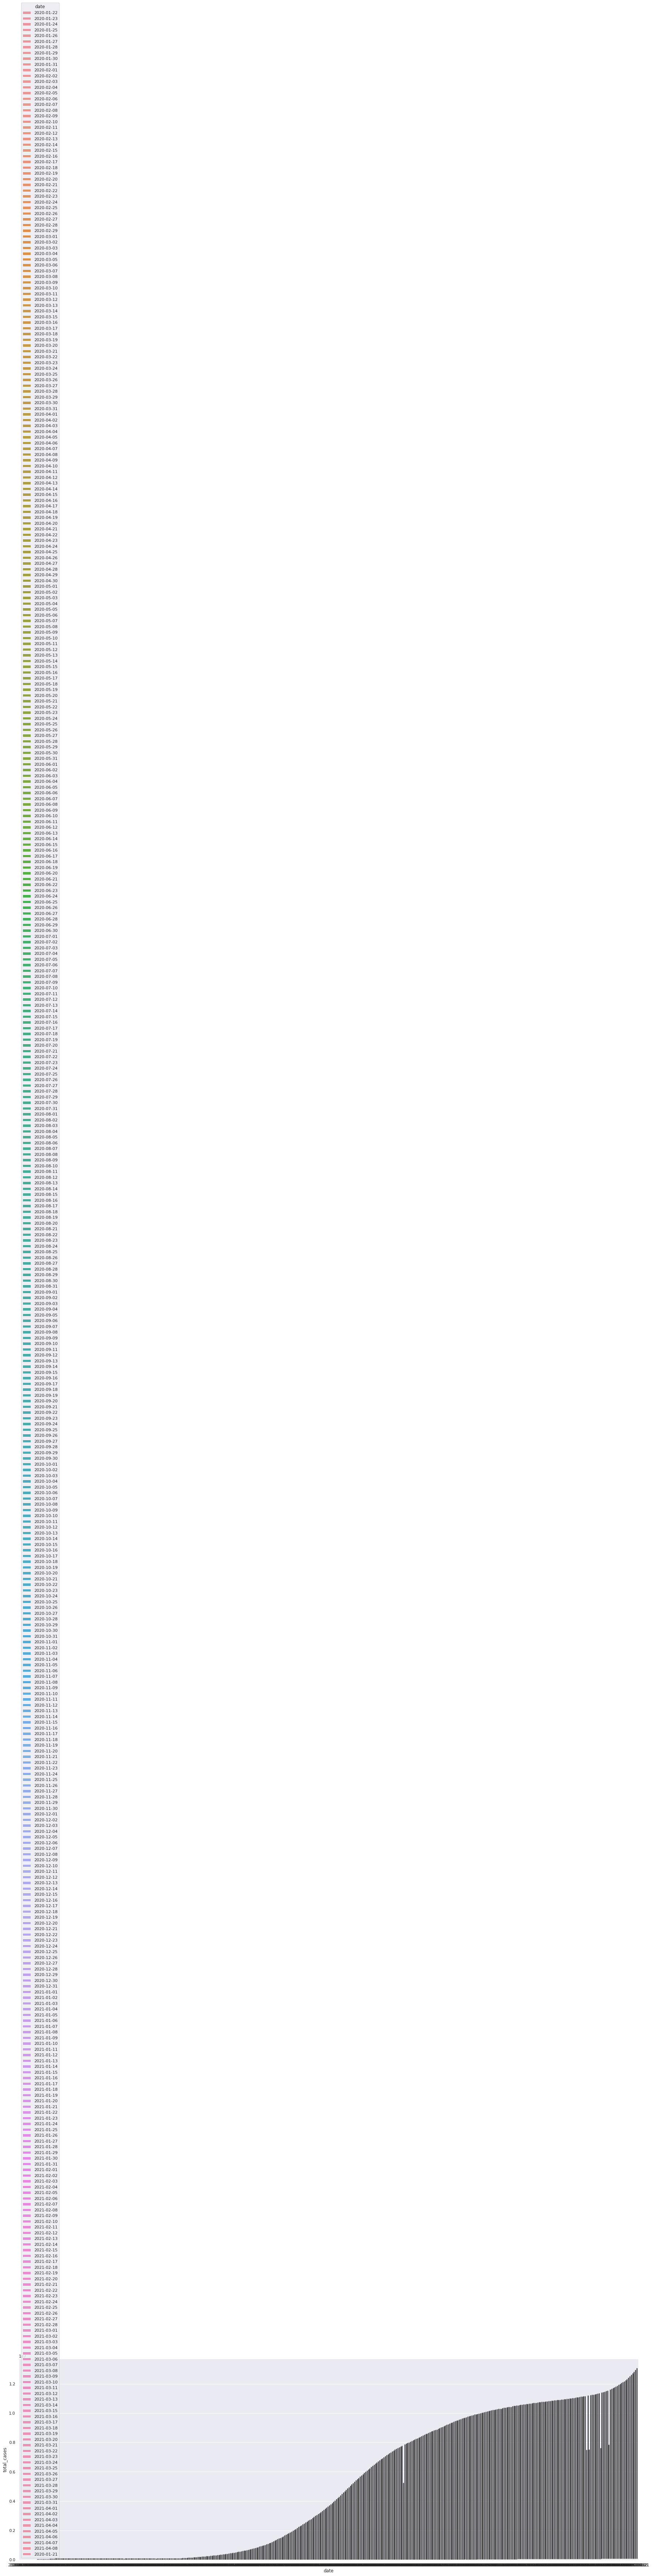

In [ ]:
# Total cases per day
sns.set(rc={'figure.figsize':(30,10)})
sns.barplot(x="date",y="total_cases",data=three_countries,hue="date")
plt.show()

In [ ]:
#Getting last date of cases from dataset
l_d_c=data[data["date"]=="2021-04-08"]
l_d_c

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
409,AFG,Asia,Afghanistan,2021-04-08,56943.0,70.0,60.857,2516.0,4.0,3.857,1462.765,1.798,1.563,64.632,0.103,0.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511
830,OWID_AFR,NaN,Africa,2021-04-08,4318252.0,16829.0,11256.429,114937.0,351.0,253.000,3221.138,12.553,8.397,85.736,0.262,0.189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12884136.0,8444379.0,4431536.0,88440.0,205581.0,0.96,0.63,0.33,153.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1239,ALB,Europe,Albania,2021-04-08,127509.0,317.0,286.143,2297.0,6.0,8.000,44307.805,110.154,99.431,798.179,2.085,2.780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242542.0,NaN,NaN,10163.0,12440.0,8.43,NaN,NaN,4323.0,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795
1648,DZA,Africa,Algeria,2021-04-08,118116.0,112.0,116.000,3119.0,3.0,3.286,2693.573,2.554,2.645,71.127,0.068,0.075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748
2051,AND,Europe,Andorra,2021-04-08,12409.0,46.0,50.857,120.0,1.0,0.714,160603.119,595.354,658.217,1553.096,12.942,9.245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78742,VNM,Asia,Vietnam,2021-04-08,2668.0,9.0,7.286,35.0,0.0,0.000,27.409,0.092,0.075,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56359.0,56359.0,NaN,1208.0,735.0,0.06,0.06,NaN,8.0,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704
79185,OWID_WRL,NaN,World,2021-04-08,133943335.0,839850.0,619320.000,2901909.0,14631.0,10608.143,17183.681,107.745,79.453,372.288,1.877,1.361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,733599574.0,410171723.0,158688128.0,20185504.0,16267223.0,9.41,5.26,2.04,2087.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
79549,YEM,Asia,Yemen,2021-04-08,5133.0,86.0,86.000,1004.0,18.0,14.000,172.098,2.883,2.883,33.662,0.604,0.469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
# sorting data with respect to total _cases maximum
max_cases_location=l_d_c.sort_values(by="total_cases",ascending=False)
max_cases_location

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
79185,OWID_WRL,NaN,World,2021-04-08,133943335.0,839850.0,619320.000,2901909.0,14631.0,10608.143,17183.681,107.745,79.453,372.288,1.877,1.361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,733599574.0,410171723.0,158688128.0,20185504.0,16267223.0,9.41,5.26,2.04,2087.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58,0.737
24805,OWID_EUR,NaN,Europe,2021-04-08,41352287.0,282881.0,178968.571,943315.0,4868.0,3457.143,55233.589,377.840,239.045,1259.971,6.502,4.618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146431040.0,107112417.0,39072227.0,2594059.0,2147374.0,19.56,14.31,5.22,2868.0,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53252,OWID_NAM,NaN,North America,2021-04-08,35791663.0,98353.0,80291.571,818017.0,1656.0,1421.000,60451.517,166.117,135.611,1381.617,2.797,2.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195536044.0,129696532.0,69148012.0,4240533.0,3668345.0,33.03,21.91,11.68,6196.0,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76578,USA,North America,United States,2021-04-08,31002264.0,79878.0,66056.571,560116.0,1000.0,978.286,93661.680,241.321,199.565,1692.180,3.021,2.956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174879716.0,112046611.0,66203123.0,3403061.0,3035473.0,52.29,33.50,19.80,9076.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926
4183,OWID_ASI,NaN,Asia,2021-04-08,30353144.0,280475.0,235411.143,441906.0,2014.0,1769.429,6541.841,60.449,50.737,95.241,0.434,0.381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330955328.0,129834299.0,34164274.0,12155602.0,9051257.0,7.13,2.80,0.74,1951.0,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14019,CYM,North America,Cayman Islands,2021-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55053.0,31459.0,23594.0,1579.0,613.0,83.77,47.87,35.90,9327.0,NaN,6.572000e+04,256.496,NaN,NaN,NaN,49903.029,NaN,NaN,13.22,NaN,NaN,NaN,NaN,83.92,NaN
25317,FRO,Europe,Faeroe Islands,2021-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11494.0,7345.0,4149.0,NaN,80.0,23.52,15.03,8.49,1637.0,NaN,4.886500e+04,35.308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.67,NaN
32159,HKG,Asia,Hong Kong,2021-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
#highest 5 countries with maximum cases
max_cases_location[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
24805,OWID_EUR,NaN,Europe,2021-04-08,41352287.0,282881.0,178968.571,943315.0,4868.0,3457.143,55233.589,377.840,239.045,1259.971,6.502,4.618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146431040.0,107112417.0,39072227.0,2594059.0,2147374.0,19.56,14.31,5.22,2868.0,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53252,OWID_NAM,NaN,North America,2021-04-08,35791663.0,98353.0,80291.571,818017.0,1656.0,1421.000,60451.517,166.117,135.611,1381.617,2.797,2.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195536044.0,129696532.0,69148012.0,4240533.0,3668345.0,33.03,21.91,11.68,6196.0,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76578,USA,North America,United States,2021-04-08,31002264.0,79878.0,66056.571,560116.0,1000.0,978.286,93661.680,241.321,199.565,1692.180,3.021,2.956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174879716.0,112046611.0,66203123.0,3403061.0,3035473.0,52.29,33.50,19.80,9076.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
4183,OWID_ASI,NaN,Asia,2021-04-08,30353144.0,280475.0,235411.143,441906.0,2014.0,1769.429,6541.841,60.449,50.737,95.241,0.434,0.381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330955328.0,129834299.0,34164274.0,12155602.0,9051257.0,7.13,2.80,0.74,1951.0,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25247,OWID_EUN,NaN,European Union,2021-04-08,27962165.0,237721.0,138882.000,636650.0,3733.0,2409.143,62847.757,534.302,312.151,1430.934,8.390,5.415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88673432.0,63084169.0,25589261.0,2246989.0,1589202.0,19.93,14.18,5.75,3572.0,NaN,4.449191e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


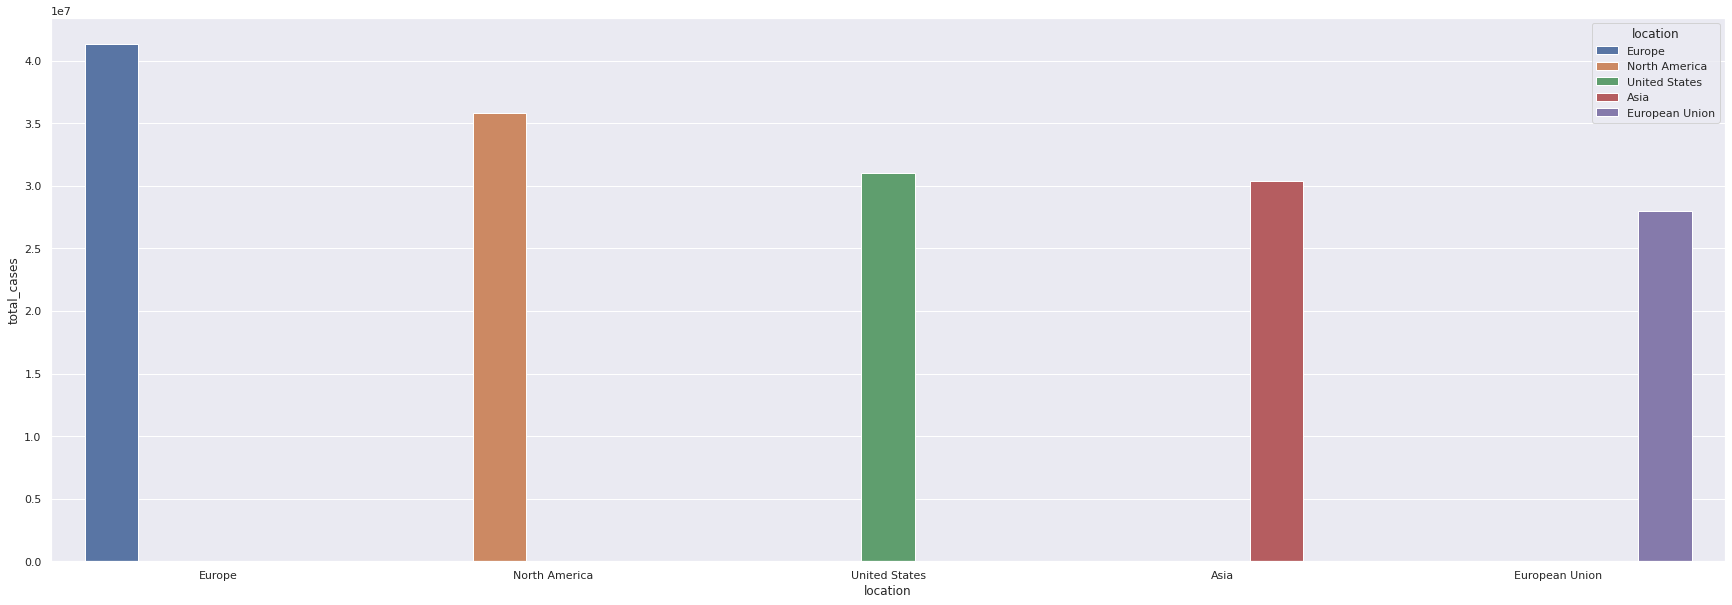

In [ ]:
#Making bar-graph for countries with highest cases
sns.barplot(x="location",y="total_cases",data=max_cases_location[1:6],hue="location")
plt.show()

In [ ]:
#sorting data with respect to total_cases minimum
min_cases_location=l_d_c.sort_values(by="total_cases",ascending=True)
min_cases_location

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
47174,FSM,Oceania,Micronesia (country),2021-04-08,1.0,0.0,0.0,NaN,NaN,0.0,8.694,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115021.0,150.777,23.0,4.810,2.392,3299.464,16.0,454.343,12.02,NaN,NaN,NaN,NaN,67.88,0.620
61665,WSM,Oceania,Samoa,2021-04-08,3.0,0.0,0.0,NaN,NaN,0.0,15.120,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198410.0,69.413,22.0,5.606,3.564,6021.557,NaN,348.977,9.21,16.7,38.1,NaN,NaN,73.32,0.715
77510,VUT,Oceania,Vanuatu,2021-04-08,3.0,0.0,0.0,NaN,NaN,0.0,9.767,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307150.0,22.662,23.1,4.394,2.620,2921.909,13.2,546.300,12.02,2.8,34.5,25.209,NaN,70.47,0.609
45854,MHL,Oceania,Marshall Islands,2021-04-08,4.0,0.0,0.0,NaN,NaN,0.0,67.574,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59194.0,295.150,NaN,NaN,NaN,3819.202,NaN,557.793,30.53,NaN,NaN,82.502,2.7,73.70,0.704
65874,SLB,Oceania,Solomon Islands,2021-04-08,19.0,0.0,0.0,NaN,NaN,0.0,27.661,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,686878.0,21.841,20.8,3.507,2.043,2205.923,25.1,459.780,18.68,NaN,NaN,35.890,1.4,73.00,0.567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14019,CYM,North America,Cayman Islands,2021-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55053.0,31459.0,23594.0,1579.0,613.0,83.77,47.87,35.90,9327.0,NaN,65720.0,256.496,NaN,NaN,NaN,49903.029,NaN,NaN,13.22,NaN,NaN,NaN,NaN,83.92,NaN
25317,FRO,Europe,Faeroe Islands,2021-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11494.0,7345.0,4149.0,NaN,80.0,23.52,15.03,8.49,1637.0,NaN,48865.0,35.308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.67,NaN
32159,HKG,Asia,Hong Kong,2021-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,700167.0,529435.0,170732.0,40381.0,25685.0,9.34,7.06,2.28,3426.0,NaN,7496988.0,7039.714,44.8,16.303,10.158,56054.920,NaN,NaN,8.33,NaN,NaN,NaN,NaN,84.86,0.949
35545,IMN,Europe,Isle of Man,2021-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58497.0,43094.0,15403.0,1263.0,985.0,68.

In [ ]:
#lowest 5 countries with minimum cases
min_cases_location[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
61665,WSM,Oceania,Samoa,2021-04-08,3.0,0.0,0.0,NaN,NaN,0.0,15.120,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198410.0,69.413,22.0,5.606,3.564,6021.557,NaN,348.977,9.21,16.7,38.1,NaN,NaN,73.32,0.715
77510,VUT,Oceania,Vanuatu,2021-04-08,3.0,0.0,0.0,NaN,NaN,0.0,9.767,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307150.0,22.662,23.1,4.394,2.620,2921.909,13.2,546.300,12.02,2.8,34.5,25.209,NaN,70.47,0.609
45854,MHL,Oceania,Marshall Islands,2021-04-08,4.0,0.0,0.0,NaN,NaN,0.0,67.574,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59194.0,295.150,NaN,NaN,NaN,3819.202,NaN,557.793,30.53,NaN,NaN,82.502,2.7,73.70,0.704
65874,SLB,Oceania,Solomon Islands,2021-04-08,19.0,0.0,0.0,NaN,NaN,0.0,27.661,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,686878.0,21.841,20.8,3.507,2.043,2205.923,25.1,459.780,18.68,NaN,NaN,35.890,1.4,73.00,0.567
77909,VAT,Europe,Vatican,2021-04-08,27.0,0.0,0.0,NaN,NaN,0.0,33374.536,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN


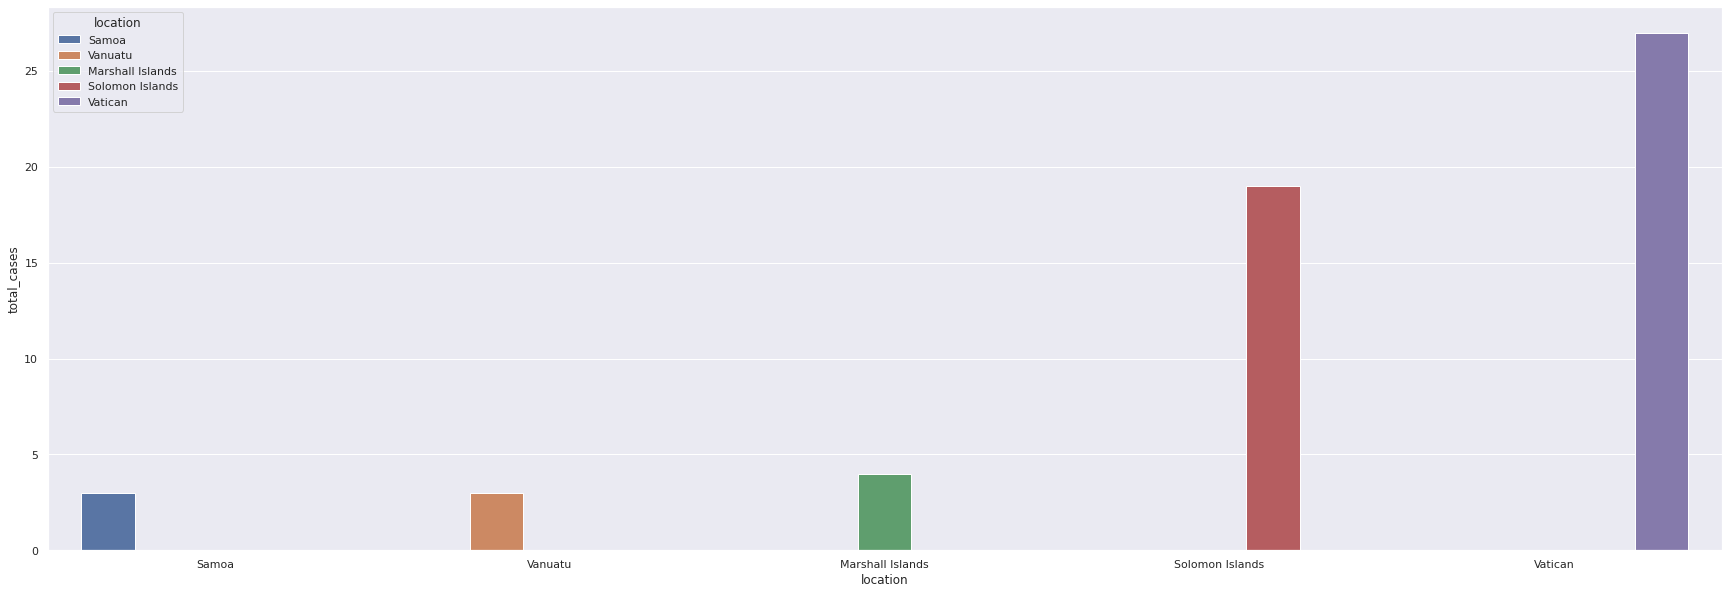

In [ ]:
#Making bar-graph for countries with lowest cases
sns.barplot(x="location",y="total_cases",data=min_cases_location[1:6],hue="location")
plt.show()

In [ ]:
# sorting data with respect to total_deaths maximum
max_death_location=l_d_c.sort_values(by="total_deaths",ascending=False)
max_death_location

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
79185,OWID_WRL,NaN,World,2021-04-08,133943335.0,839850.0,619320.000,2901909.0,14631.0,10608.143,17183.681,107.745,79.453,372.288,1.877,1.361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,733599574.0,410171723.0,158688128.0,20185504.0,16267223.0,9.41,5.26,2.04,2087.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
24805,OWID_EUR,NaN,Europe,2021-04-08,41352287.0,282881.0,178968.571,943315.0,4868.0,3457.143,55233.589,377.840,239.045,1259.971,6.502,4.618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146431040.0,107112417.0,39072227.0,2594059.0,2147374.0,19.56,14.31,5.22,2868.0,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53252,OWID_NAM,NaN,North America,2021-04-08,35791663.0,98353.0,80291.571,818017.0,1656.0,1421.000,60451.517,166.117,135.611,1381.617,2.797,2.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195536044.0,129696532.0,69148012.0,4240533.0,3668345.0,33.03,21.91,11.68,6196.0,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25247,OWID_EUN,NaN,European Union,2021-04-08,27962165.0,237721.0,138882.000,636650.0,3733.0,2409.143,62847.757,534.302,312.151,1430.934,8.390,5.415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88673432.0,63084169.0,25589261.0,2246989.0,1589202.0,19.93,14.18,5.75,3572.0,NaN,4.449191e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67102,OWID_SAM,NaN,South America,2021-04-08,22087381.0,161096.0,113128.857,582714.0,5742.0,3706.429,51275.403,373.981,262.626,1352.759,13.330,8.604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46704345.0,34851539.0,11852806.0,1031059.0,1155568.0,10.84,8.09,2.75,2683.0,NaN,4.307598e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60741,KNA,North America,Saint Kitts and Nevis,2021-04-08,44.0,0.0,0.000,NaN,NaN,0.000,827.192,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.319200e+04,212.865,NaN,NaN,NaN,24654.385,NaN,NaN,12.84,NaN,NaN,NaN,2.300,76.23,0.779
61665,WSM,Oceania,Samoa,2021-04-08,3.0,0.0,0.000,NaN,NaN,0.000,15.120,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.984100e+05,69.413,22.0,5.606,3.564,6021.557,NaN,348.977,9.21,16.700,38.100,NaN,NaN,73.32,0.715
65874,SLB,Oceania,Solomon Islands,2021-04-08,19.0,0.0,0.000,NaN,NaN,0.000,27.661,0.000,0.000,NaN,Na

In [ ]:
#highest 5 countries with maximum death
max_death_location[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
24805,OWID_EUR,NaN,Europe,2021-04-08,41352287.0,282881.0,178968.571,943315.0,4868.0,3457.143,55233.589,377.840,239.045,1259.971,6.502,4.618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146431040.0,107112417.0,39072227.0,2594059.0,2147374.0,19.56,14.31,5.22,2868.0,NaN,748680069.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53252,OWID_NAM,NaN,North America,2021-04-08,35791663.0,98353.0,80291.571,818017.0,1656.0,1421.000,60451.517,166.117,135.611,1381.617,2.797,2.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195536044.0,129696532.0,69148012.0,4240533.0,3668345.0,33.03,21.91,11.68,6196.0,NaN,592072204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25247,OWID_EUN,NaN,European Union,2021-04-08,27962165.0,237721.0,138882.000,636650.0,3733.0,2409.143,62847.757,534.302,312.151,1430.934,8.390,5.415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88673432.0,63084169.0,25589261.0,2246989.0,1589202.0,19.93,14.18,5.75,3572.0,NaN,444919060.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67102,OWID_SAM,NaN,South America,2021-04-08,22087381.0,161096.0,113128.857,582714.0,5742.0,3706.429,51275.403,373.981,262.626,1352.759,13.330,8.604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46704345.0,34851539.0,11852806.0,1031059.0,1155568.0,10.84,8.09,2.75,2683.0,NaN,430759772.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76578,USA,North America,United States,2021-04-08,31002264.0,79878.0,66056.571,560116.0,1000.0,978.286,93661.680,241.321,199.565,1692.180,3.021,2.956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174879716.0,112046611.0,66203123.0,3403061.0,3035473.0,52.29,33.50,19.80,9076.0,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


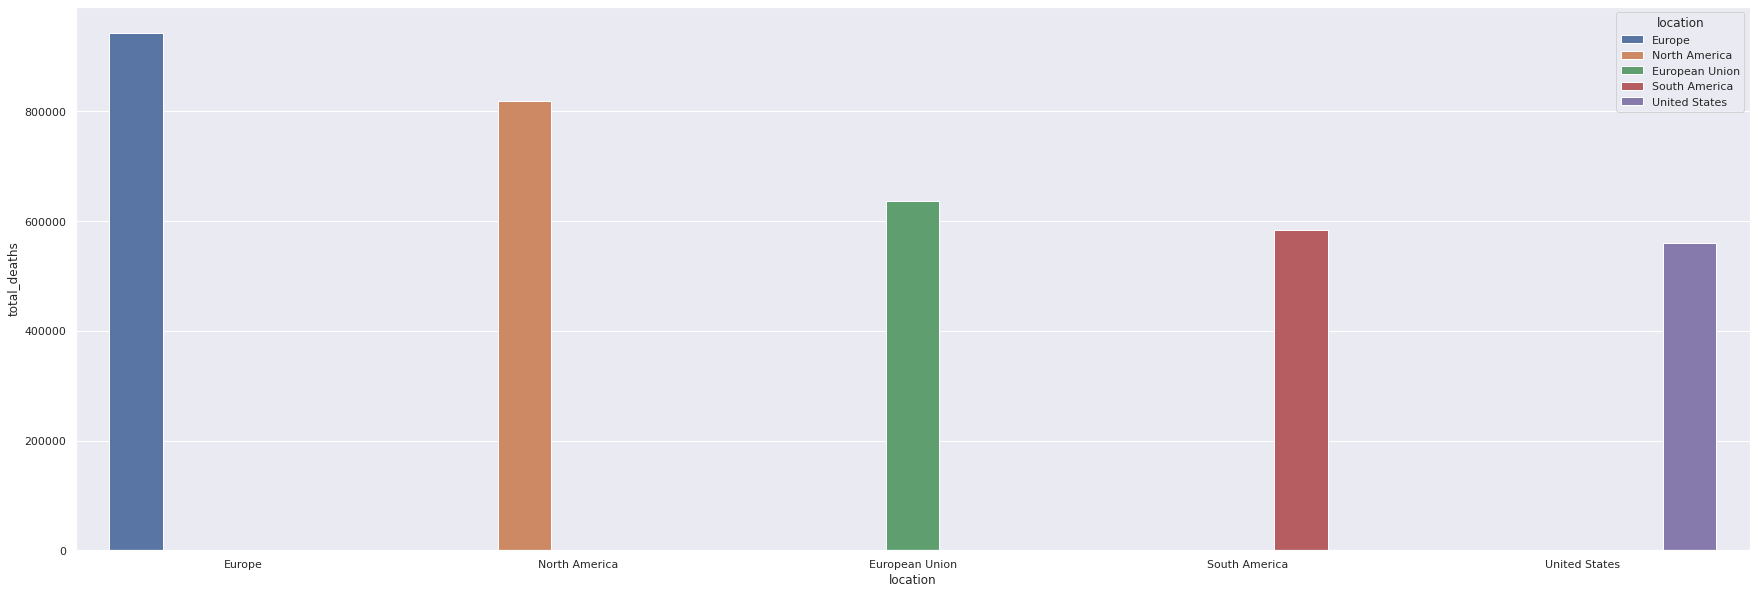

In [ ]:
#Making bar-graph for countries with highest deaths
sns.barplot(x="location",y="total_deaths",data=max_death_location[1:6],hue="location")
plt.show()

In [ ]:
#sorting data with respect to total_deaths minimum
min_death_location=l_d_c.sort_values(by="total_deaths",ascending=True)
min_death_location

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
9115,BTN,Asia,Bhutan,2021-04-08,900.0,0.0,2.000,1.0,0.0,0.000,1166.389,0.000,2.592,1.296,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,472139.0,472139.0,NaN,1163.0,5329.0,61.19,61.19,NaN,6906.0,NaN,771612.0,21.188,28.6,4.885,2.977,8708.597,1.5,217.066,9.75,NaN,NaN,79.807,1.7,71.78,0.654
29606,GRD,North America,Grenada,2021-04-08,155.0,0.0,0.000,1.0,0.0,0.000,1377.545,0.000,0.000,8.887,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112519.0,317.132,29.4,7.304,5.021,13593.877,NaN,243.964,10.71,NaN,NaN,NaN,3.7,72.40,0.779
72821,TLS,Asia,Timor,2021-04-08,787.0,8.0,20.571,1.0,0.0,0.143,596.917,6.068,15.603,0.758,0.0,0.108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1318442.0,87.176,18.0,3.556,1.897,6570.102,30.3,335.346,6.86,6.3,78.1,28.178,5.9,69.50,0.606
25800,FJI,Oceania,Fiji,2021-04-08,67.0,0.0,0.000,2.0,0.0,0.000,74.740,0.000,0.000,2.231,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,896444.0,49.562,28.6,6.224,3.284,8702.975,1.4,412.820,14.49,10.2,34.8,NaN,2.3,67.44,0.743
11088,BRN,Asia,Brunei,2021-04-08,216.0,1.0,0.429,3.0,0.0,0.000,493.733,2.286,0.980,6.857,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,437483.0,81.347,32.4,4.591,2.382,71809.251,NaN,201.285,12.79,2.0,30.9,NaN,2.7,75.86,0.838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60741,KNA,North America,Saint Kitts and Nevis,2021-04-08,44.0,0.0,0.000,NaN,NaN,0.000,827.192,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53192.0,212.865,NaN,NaN,NaN,24654.385,NaN,NaN,12.84,NaN,NaN,NaN,2.3,76.23,0.779
61665,WSM,Oceania,Samoa,2021-04-08,3.0,0.0,0.000,NaN,NaN,0.000,15.120,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198410.0,69.413,22.0,5.606,3.564,6021.557,NaN,348.977,9.21,16.7,38.1,NaN,NaN,73.32,0.715
65874,SLB,Oceania,Solomon Islands,2021-04-08,19.0,0.0,0.000,NaN,NaN,0.000,27.661,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,686878.0,21.841,20.8,3.507,2.043,2205.923,25.1,459.780,18.68,NaN,NaN,35.890,1.4,73.00,0.567
77510,VUT,Oceania,Vanuatu,2021-04-08,3.0,0.0,0.000,NaN,NaN,0.000,9.767,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
#lowest 5 countries with maximum death
min_death_location[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
29606,GRD,North America,Grenada,2021-04-08,155.0,0.0,0.000,1.0,0.0,0.000,1377.545,0.000,0.000,8.887,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112519.0,317.132,29.4,7.304,5.021,13593.877,NaN,243.964,10.71,NaN,NaN,NaN,3.7,72.40,0.779
72821,TLS,Asia,Timor,2021-04-08,787.0,8.0,20.571,1.0,0.0,0.143,596.917,6.068,15.603,0.758,0.0,0.108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1318442.0,87.176,18.0,3.556,1.897,6570.102,30.3,335.346,6.86,6.3,78.1,28.178,5.9,69.50,0.606
25800,FJI,Oceania,Fiji,2021-04-08,67.0,0.0,0.000,2.0,0.0,0.000,74.740,0.000,0.000,2.231,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,896444.0,49.562,28.6,6.224,3.284,8702.975,1.4,412.820,14.49,10.2,34.8,NaN,2.3,67.44,0.743
11088,BRN,Asia,Brunei,2021-04-08,216.0,1.0,0.429,3.0,0.0,0.000,493.733,2.286,0.980,6.857,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,437483.0,81.347,32.4,4.591,2.382,71809.251,NaN,201.285,12.79,2.0,30.9,NaN,2.7,75.86,0.838
12254,BDI,Africa,Burundi,2021-04-08,3027.0,10.0,26.429,6.0,0.0,0.000,254.567,0.841,2.223,0.505,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11890781.0,423.062,17.5,2.562,1.504,702.225,71.7,293.068,6.05,NaN,NaN,6.144,0.8,61.58,0.433


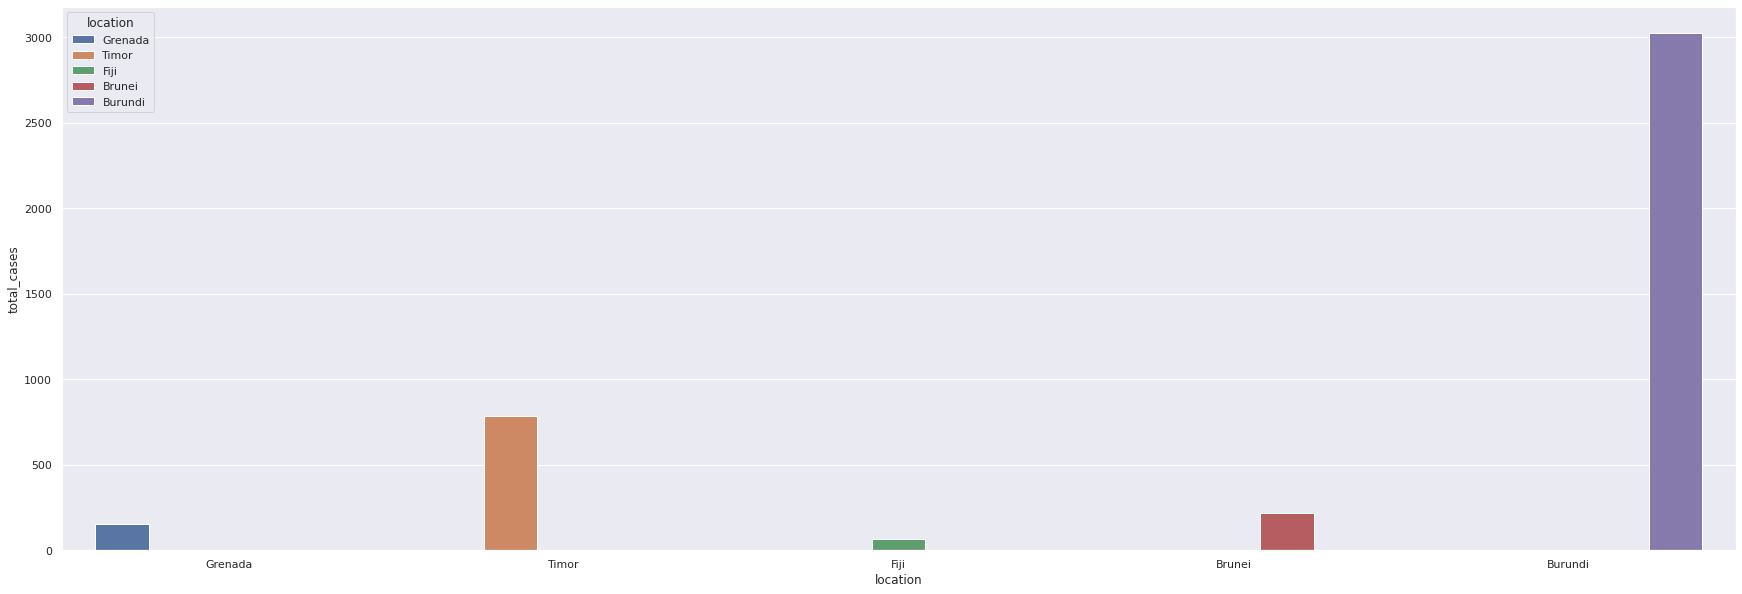

In [ ]:
#Making bar-graph for countries with lowest deaths
sns.barplot(x="location",y="total_cases",data=min_death_location[1:6],hue="location")
plt.show()

In [ ]:
#linear regression using sk learn
#converting string date to date-time
india_case['date']=pd.to_datetime(india_case['date'])
india_case.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
32969,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32970,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32971,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32972,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32973,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


In [ ]:
#coverting date-time to ordinal
india_case['date']=india_case['date'].map(dt.datetime.toordinal)
india_case.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
32969,IND,Asia,India,737454,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32970,IND,Asia,India,737455,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32971,IND,Asia,India,737456,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32972,IND,Asia,India,737457,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32973,IND,Asia,India,737458,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


In [ ]:
# getting dependent variable and ingrdient variable
x=india_case['date']
y=india_case['total_cases']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
lr=LinearRegression()

In [ ]:
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
india_case.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
33399,IND,Asia,India,737884,12589067.0,103558.0,78489.000,165101.0,478.0,465.429,9122.483,75.042,56.876,119.638,0.346,0.337,1.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1166716.0,248125908.0,179.801,0.845,1025009.0,0.743,0.077,13.1,samples tested,79105163.0,68678838.0,10426325.0,3125512.0,2653533.0,5.73,4.98,0.76,1923.0,74.54,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
33400,IND,Asia,India,737885,12686049.0,96982.0,84313.429,165547.0,446.0,490.429,9192.760,70.277,61.096,119.961,0.323,0.355,1.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,893749.0,249019657.0,180.448,0.648,1022214.0,0.741,0.082,12.1,samples tested,83110926.0,72277309.0,10833617.0,4005763.0,3142510.0,6.02,5.24,0.79,2277.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
33401,IND,Asia,India,737886,12801785.0,115736.0,93207.143,166177.0,630.0,529.857,9276.626,83.866,67.541,120.418,0.457,0.384,1.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1211612.0,250231269.0,181.326,0.878,1083035.0,0.785,0.086,11.6,samples tested,87077474.0,75937015.0,11140459.0,3966548.0,3431874.0,6.31,5.50,0.81,2487.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
33402,IND,Asia,India,737887,12928574.0,126789.0,100987.000,166862.0,685.0,562.143,9368.502,91.876,73.179,120.914,0.496,0.407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1208329.0,251439598.0,182.202,0.876,1109523.0,0.804,0.091,11.0,samples tested,90198673.0,78763027.0,11435646.0,3121199.0,3582968.0,6.54,5.71,0.83,2596.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
33403,IND,Asia,India,737888,13060542.0,131968.0,108201.571,167642.0,780.0,606.571,9464.131,95.629,78.407,121.479,0.565,0.440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1237781.0,252677379.0,183.099,0.897,1125537.0,0.816,0.096,10.4,samples tested,94334262.0,82456522.0,11877740.0,4135589.0,3649303.0,6.84,5.98,0.86,2644.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


In [ ]:
y_pred=lr.predict(np.array(x_test).reshape(-1,1))

In [ ]:
mean_squared_error(x_test,y_pred)

39200020835246.67

In [ ]:
lr.predict(np.array([[737573]]))

array([[1459190.01576996]])

In [ ]:
lr.predict(np.array([[737888]]))

array([[12757031.79702377]])